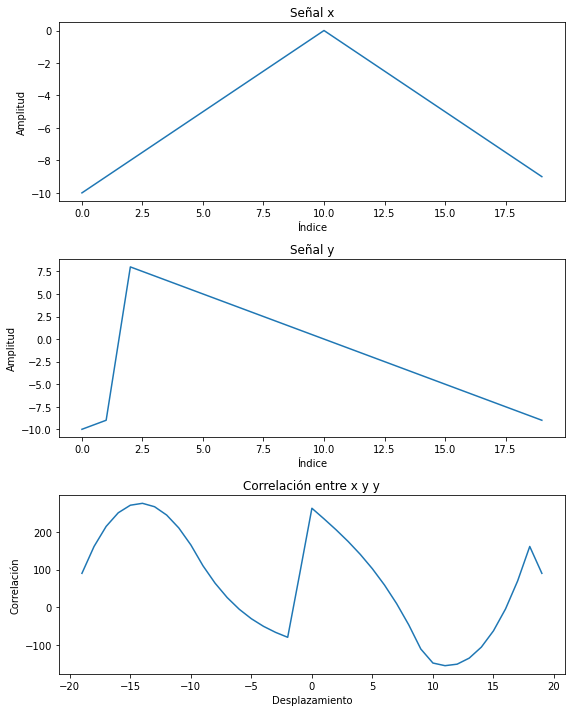

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = []
y = []

# Definir las dos señales
for i in range (20):
    if (i <= 10):
        x.append(-10 + i)
    else:
        x.append(10 - i)
    if (i <= 1):
        y.append(-10 + i)
    else:
        y.append(10 - i)
        

    
#y = x[::-1]  # Señal y

# Calcular la correlación
correlation = np.correlate(x, y, mode='full')

# Crear una figura y un conjunto de subfiguras
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# Subfigura 1: Señal x
axes[0].plot(x)
axes[0].set_xlabel('Índice')
axes[0].set_ylabel('Amplitud')
axes[0].set_title('Señal x')

# Subfigura 2: Señal y
axes[1].plot(y)
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('Amplitud')
axes[1].set_title('Señal y')

# Subfigura 3: Correlación
indices = np.arange(len(correlation)) - len(y) + 1
axes[2].plot(indices, correlation)
axes[2].set_xlabel('Desplazamiento')
axes[2].set_ylabel('Correlación')
axes[2].set_title('Correlación entre x y y')

# Ajustar los espacios entre subfiguras y mostrar la figura
plt.tight_layout()
plt.show()

In [2]:
file = "xcorr_py.txt"
with open(file, "w") as f:
    for i in range(len(correlation)):
        f.write(str(int(correlation[i])))
        f.write("\n")

In [3]:
def to_signed_fixed_point(num, integer_bits, decimal_bits):
    if num < 0:
        sign = 1
        num *= -1
    else:
        sign = 0
    integer_part = int(num)
    decimal_part = num - integer_part
    binary_integer_part = format(integer_part, f'0{integer_bits}b')
    binary_decimal_part = ''
    while decimal_part > 0 and len(binary_decimal_part) < decimal_bits:
        decimal_part *= 2
        if decimal_part >= 1:
            binary_decimal_part += '1'
            decimal_part -= 1
        else:
            binary_decimal_part += '0'
    binary_number = binary_integer_part + binary_decimal_part
    if sign == 1:
        inverted_binary_number = ''
        for bit in binary_number:
            if bit == '1':
                inverted_binary_number += '0'
            elif bit == '0':
                inverted_binary_number += '1'
        binary_number = inverted_binary_number
        binary_number = binary_number[::-1]
        carry = 1
        inverted_twos_complement_binary = ''
        for bit in binary_number:
            if bit == '1' and carry == 1:
                inverted_twos_complement_binary += '0'
            elif bit == '0' and carry == 1:
                inverted_twos_complement_binary += '1'
                carry = 0
            else:
                inverted_twos_complement_binary += bit
        twos_complement_binary = inverted_twos_complement_binary[::-1]
        return twos_complement_binary
    else:
        return binary_number

In [5]:
# Store noisy signal with data x line
file = "input_file.txt"
with open(file, "w") as f:
    for i in range(len(x)):
        f.write(str(to_signed_fixed_point(x[i], 8, 0)))
        #for j in range (3, -1, 1):
            #f.write(str(to_signed_fixed_point(noisy_signal[i], 2, 30)[j*8:8*(j+1)]))
        f.write("\n")
    for i in range(len(y)):
        f.write(str(to_signed_fixed_point(y[i], 8, 0)))
        #for j in range (3, -1, 1):
            #f.write(str(to_signed_fixed_point(noisy_signal[i], 2, 30)[j*8:8*(j+1)]))
        f.write("\n")

In [14]:
import numpy as np
import time
import serial
#Enviar senyal directament en binary
send_signal = np.loadtxt('input_file.txt', dtype = 'str')

ser = serial.Serial(port='COM13', baudrate=500000, bytesize=8, parity='N', stopbits=1, timeout=None, xonxoff=0, rtscts=0)

ser.reset_input_buffer()
ser.reset_output_buffer()

usleep = lambda x: time.sleep(x/1000000.0)

bytes_uart = []
for i in range(len(send_signal)):
    byte_to_int = int(send_signal[i],2)
    #print(send_signal[i])
    print(byte_to_int)
    ser.write([byte_to_int])
    bytes_uart.append(byte_to_int)

#usleep(10)

3
4
3
0
252
250
252
1
5
7
4
254
249
248
252
3
9
9
3
251
246
247
253
6
12
10
1
248
243
246
0
10
14
9
254
244
242
248
3
13
15
7
251
242
241
250
7
15
14
4
247
240
243
254
10
16
12
0
244
240
245
1
13
16
9
253
243
241
249
5
13
14
6
250
243
244
252
7
13
11
2
249
244
247
255
7
11
7
255
249
247
251
1
6
7
4
254
251
251
254
2
4
3
1
255
254
255
0
0
0
0
0
1
2
2
0
253
252
253
1
5
6
4
254
249
248
252
3
10
10
4
250
244
245
253
8
15
12
2
245
239
243
0
13
19
13
254
240
236
244
5
19
21
11
248
235
234
247
11
24
22
6
242
231
235
252
16
27
20
1
237
229
238
2
22
27
16
251
233
229
242
8
25
26
11
245
231
232
248
13
25
22
4
241
231
237
254
16
23
16
255
239
235
243
3
16
19
10
251
241
240
249
6
14
12
4
250
245
247
254
5
8
5
1
253
252
254
0
1
0
255
0
3
4
3
254
249
247
251
4
12
13
5
248
239
239
251
12
23
20
3
238
227
234
0
24
34
23
252
225
216
233
9
38
44
22
240
210
208
237
23
53
51
15
224
195
204
246
41
67
52
2
205
183
206
6
60
78
47
241
186
174
214
26
79
84
35
219
168
172
229
49
96
83
18
195
154
176
249
72
107
7

In [15]:
data = []
while ser.in_waiting > 0:
    data_byte = ser.read()
    data.append(data_byte)
    print(data_byte.hex())

ser.close()

fa
ff
ff
ff
fe
ff
ff
ff
0e
00
00
00
1f
00
00
00
23
00
00
00
0b
00
00
00
e1
ff
ff
ff
c1
ff
ff
ff
c8
ff
ff
ff
f3
ff
ff
ff
2d
00
00
00
50
00
00
00
40
00
00
00
08
00
00
00
cb
ff
ff
ff
b1
ff
ff
ff
c8
ff
ff
ff
ff
ff
ff
ff
2f
00
00
00
37
00
00
00
1c
00
00
00
fd
ff
ff
ff
f7
ff
ff
ff
02
00
00
00
02
00
00
00
e6
ff
ff
ff
bb
ff
ff
ff
a9
ff
ff
ff
db
ff
ff
ff
4f
00
00
00
c0
00
00
00
ce
00
00
00
3f
00
00
00
4a
ff
ff
ff
8a
fe
ff
ff
a0
fe
ff
ff
bb
ff
ff
ff
57
01
00
00
66
02
00
00
fe
01
00
00
15
00
00
00
b6
fd
ff
ff
76
fc
ff
ff
6e
fd
ff
ff
5d
00
00
00
91
03
00
00
e0
04
00
00
14
03
00
00
e5
fe
ff
ff
d2
fa
ff
ff
a8
f9
ff
ff
99
fc
ff
ff
3a
02
00
00
1f
07
00
00
e2
07
00
00
76
03
00
00
31
fc
ff
ff
9b
f6
ff
ff
a0
f6
ff
ff
dc
fc
ff
ff
db
05
00
00
ed
0b
00
00
bb
0a
00
00
58
02
00
00
98
f7
ff
ff
59
f1
ff
ff
28
f4
ff
ff
ff
fe
ff
ff
72
0b
00
00
7a
11
00
00
97
0c
00
00
11
ff
ff
ff
16
f1
ff
ff
c1
eb
ff
ff
31
f3
ff
ff
84
03
00
00
bd
12
00
00
dc
16
00
00
70
0c
00
00
42
f9
ff
ff
33
e9
ff
ff
dd
e6
ff
ff
a6
f4
ff
ff
9a
0

25
00
00
df
24
00
00
27
fa
ff
ff
cf
b8
ff
ff
2b
93
ff
ff
24
b4
ff
ff
e8
17
00
00
55
84
00
00
26
ab
00
00
12
62
00
00
b4
c8
ff
ff
31
3d
ff
ff
d0
21
ff
ff
f4
97
ff
ff
28
61
00
00
64
ff
00
00
90
04
01
00
f6
5e
00
00
65
6d
ff
ff
bf
c8
fe
ff
be
e2
fe
ff
86
b7
ff
ff
7c
c8
00
00
da
67
01
00
08
28
01
00
9e
26
00
00
37
00
ff
ff
c0
70
fe
ff
ba
da
fe
ff
2b
04
00
00
c6
35
01
00
46
ac
01
00
e1
15
01
00
72
ca
ff
ff
fd
97
fe
ff
27
42
fe
ff
e4
04
ff
ff
d4
6a
00
00
46
94
01
00
a0
c3
01
00
7c
d6
00
00
6b
5e
ff
ff
1f
47
fe
ff
46
42
fe
ff
0f
56
ff
ff
66
d7
00
00
75
d4
01
00
d8
ac
01
00
9d
77
00
00
e9
f5
fe
ff
e5
19
fe
ff
19
6e
fe
ff
40
be
ff
ff
9f
37
01
00
96
ed
01
00
5c
6e
01
00
6b
0a
00
00
64
a1
fe
ff
40
15
fe
ff
4d
bc
fe
ff
40
2c
00
00
c2
7d
01
00
35
de
01
00
c9
13
01
00
9e
9f
ff
ff
bd
6b
fe
ff
47
37
fe
ff
a0
1f
ff
ff
3d
90
00
00
b4
a1
01
00
60
ab
01
00
66
ab
00
00
83
45
ff
ff
d7
59
fe
ff
89
78
fe
ff
5f
89
ff
ff
1a
de
00
00
f0
a1
01
00
93
5e
01
00
b3
43
00
00
bf
05
ff
ff
6a
6a
fe
ff
d4
cd
fe
ff
da
eb
f

In [16]:
len(data)

3997

In [8]:
ser.close()

In [17]:
file_path = "output_file_fpga.txt"  # Ruta del archivo de texto de salida

# Abre un nuevo archivo en modo escritura
with open(file_path, "w") as f:
    for i in range (len(data)):
        byte_variable = data[i]
        # Convierte el byte en una cadena de bits
        bits_str = ''.join(format(byte, '08b') for byte in byte_variable)
        #print(bits_str)
        bit_write = bits_str[::-1]
        #print(bit_write)
        f.write(bit_write)
        f.write('\n')

In [18]:
def juntar_lineas(archivo_entrada, archivo_salida):
    with open(archivo_entrada, 'r') as archivo_lectura, open(archivo_salida, 'w') as archivo_escritura:
        lineas = archivo_lectura.readlines()
        for i in range(0, len(lineas), 4):
            grupo = lineas[i:i+4]
            lineas_sin_salto = [linea.strip() for linea in grupo]
            linea_unida = ''.join(lineas_sin_salto)
            archivo_escritura.write(linea_unida[::-1] + '\n')

archivo_entrada = 'output_file_fpga.txt'
archivo_salida = 'output_file_fpga_total.txt'
juntar_lineas(archivo_entrada, archivo_salida)

In [2]:
file1 = "input_file_1.txt"
with open(file1, "w") as f:
    for i in range(len(x)):
        f.write(str(int(x[i])))
        f.write("\n")
        
file = "input_file_2.txt"
with open(file, "w") as f:
    for i in range(len(y)):
        f.write(str(int(y[i])))
        f.write("\n")

In [21]:
def twos_complement_binary_to_float(binary_num, integer_bits, decimal_bits):
    def binary_addition(bin_num):
        carry = 1
        result = ""
        for bit in reversed(bin_num):
            if bit == "0" and carry == 0:
                result = "0" + result
                carry = 0
            elif bit == "0" and carry == 1:
                result = "1" + result
                carry = 0
            elif bit == "1" and carry == 0:
                result = "1" + result
                carry = 0
            elif bit == "1" and carry == 1:
                result = "0" + result
                carry = 1
        if carry == 1:
            result = "1" + result
        return result
    
    float_number = 0.0
    pos = 1
    negative = False
    
    if binary_num[0] == '1':
        negative = True
        new_binary_num = ''.join('1' if bit == '0' else '0' for bit in binary_num)
        new_binary_num = binary_addition(new_binary_num)
        #print(new_binary_num)
    else:
        new_binary_num = binary_num
    
    for bit in range(integer_bits + decimal_bits):
        if 0 <= bit < integer_bits:
            if new_binary_num[bit] == '1':
                if negative:
                    float_number -= 2 ** (integer_bits - bit - 1)
                else:
                    float_number += 2 ** (integer_bits - bit - 1)
        else:
            if new_binary_num[bit] == '1':
                if negative: 
                    float_number -= (2 ** -pos)
                else:
                    float_number += (2 ** -pos)
            pos += 1
    return float_number

In [22]:
file_path = "output_file_int.txt"
input_file = "output_file_fpga_total.txt"

integer_bits = 32
decimal_bits = 0

with open(input_file, 'r') as f1:
    with open(file_path, 'w') as f2:
        for line in f1: #la ultima linea es rara i no es de 32 bits per això dona error
            int_num = twos_complement_binary_to_float(line.rstrip(), integer_bits, decimal_bits)
            f2.write(str(int_num) + '\n')

IndexError: string index out of range

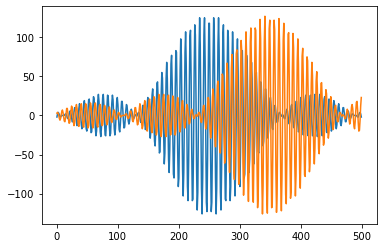

In [7]:
d1 = np.loadtxt('input_file_1.txt')
d2 = np.loadtxt('input_file_2.txt')
plt.plot(d2)
plt.plot(d1)

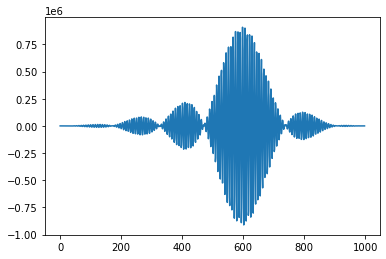

In [8]:
correlation = np.correlate(d1, d2, mode='full')
plt.plot(correlation)

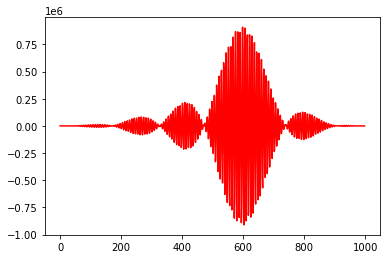

In [12]:
output_signal = np.loadtxt('output_file_int.txt')
plt.plot(output_signal, 'red')


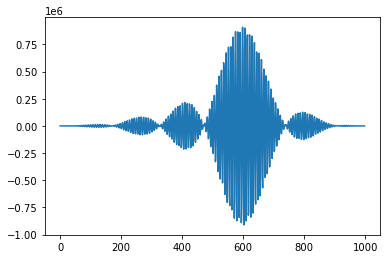

In [4]:
xcorr_py = np.loadtxt('xcorr_py_2.txt')
plt.plot(xcorr_py)

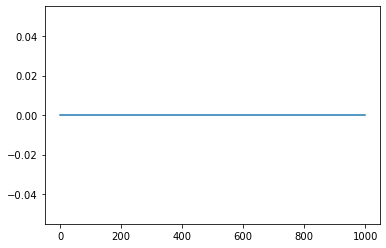

In [9]:
dif = output_signal - correlation
plt.plot(dif)

Text(0.5, 1.0, 'Hardware and Software difference')

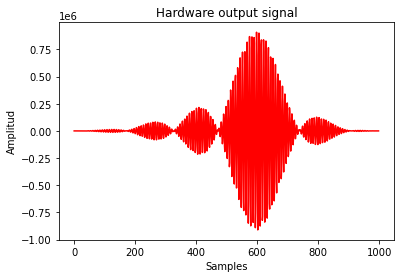

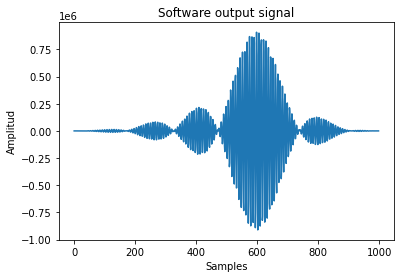

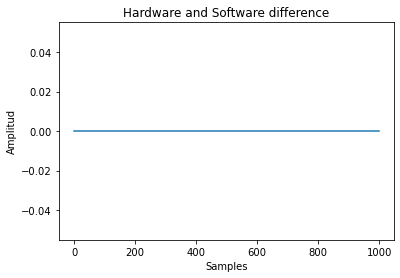

In [15]:
# Graficar señal de entrada y salida
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

ax1.plot(output_signal, 'red')
ax1.set_xlabel('Samples')
ax1.set_ylabel('Amplitud')
ax1.set_title('Hardware output signal')

ax2.plot(correlation)
ax2.set_xlabel('Samples')
ax2.set_ylabel('Amplitud')
ax2.set_title('Software output signal')

ax3.plot(dif)
ax3.set_xlabel('Samples')
ax3.set_ylabel('Amplitud')
ax3.set_title('Hardware and Software difference')

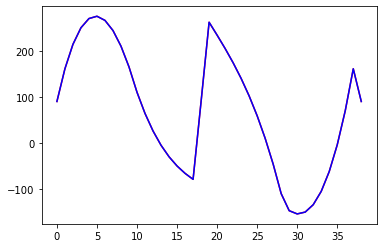

In [15]:
plt.plot(correlation, 'r')
plt.plot(output_signal, 'b')

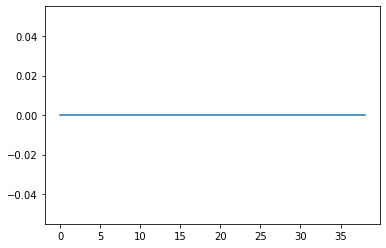

In [16]:
rest = correlation - output_signal
plt.plot(rest)